In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.subplots as sp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
pd.set_option('display.max_columns', None)

## Loading Data

In [141]:
Sales = pd.read_csv('sales_data.csv')
pd.set_option('display.max_columns', None)

Sales

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185945,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.545974e+12,Électronique,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185946,2019-12-01 12:01:00,319667,AA Batteries (4-pack),5.352480e+12,Électronique,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185947,2019-12-09 06:43:00,319668,Vareebadd Phone,2.674213e+12,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185948,2019-12-03 10:39:00,319669,Wired Headphones,5.216304e+12,Alimentation,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


In [142]:
Sales.rename({'catégorie': 'Category'}, axis=1, inplace=True)

In [143]:
Sales['Category'].unique()

array(['Vêtements', 'Alimentation', 'Sports', 'Électronique'],
      dtype=object)

## Data Cleaning

In [144]:
def missing_values_analysis(Sales):
    na_columns = [col for col in Sales.columns if Sales[col].isnull().sum()>0]
    n_miss = Sales[na_columns].isnull().sum().sort_values(ascending=True)
    ratio = (Sales[na_columns].isnull().sum()/ Sales.shape[0]*100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio,2)],axis =1, keys=['Missing Values','Ratio'])
    missing_df =pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(Sales, head=5, tail=5):
        print('SHAPE'.center(82,'~'))
        print('Rows:{}'.format(Sales.shape[0]))
        print('Columns:{}'.format(Sales.shape[1]))
        print('TYPES')
        print(Sales.dtypes)
        print("".center(82,'~'))
        print(missing_values_analysis(Sales))
        print('DUPLICATED VALUES'.center(83,'~'))
        print(Sales.duplicated().sum())
        print('QUANTILES'.center(82,'~'))
        print(Sales.quantile([0, 0.05, 0.50, 0.99,1]).T)

check_dataframe(Sales)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows:185950
Columns:11
TYPES
Order Date           object
Order ID              int64
Product              object
Product_ean         float64
Category             object
Purchase Address     object
Quantity Ordered      int64
Price Each          float64
Cost price          float64
turnover            float64
margin              float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Empty DataFrame
Columns: [Missing Values, Ratio]
Index: []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                          0.00          0.05          0.50          0.99  \
Order ID          1.412340e+05  1.501315e+05  2.303675e+05  3.178735e+05   
Product_ean       1.000083e+12  1.457559e+12  5.511235e+12  9.908212e+12   
Quantity Ordered  1.000000e

/var/folders/x6/mz0xnc7s4jd7lm8tdk0nk2140000gq/T/ipykernel_3741/1959610870.py:20: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [145]:
#Change date to datetime
Sales['Order Date'] = pd.to_datetime(Sales['Order Date'])

In [146]:
#Values for each column
def check_class(dataframe):
    nunique_df =pd.DataFrame({'Variables': dataframe.columns,
                              'Classes':[dataframe[i].nunique() \
                                for i in dataframe.columns]})
    nunique_df = nunique_df.sort_values('Classes',ascending = False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(Sales)

,Variables,Classes
0,Product_ean,185950
1,Order ID,178437
2,Order Date,142395
3,Purchase Address,140787
4,margin,54
5,turnover,53
6,Product,19
7,Price Each,17
8,Cost price,17
9,Quantity Ordered,9


## EDA

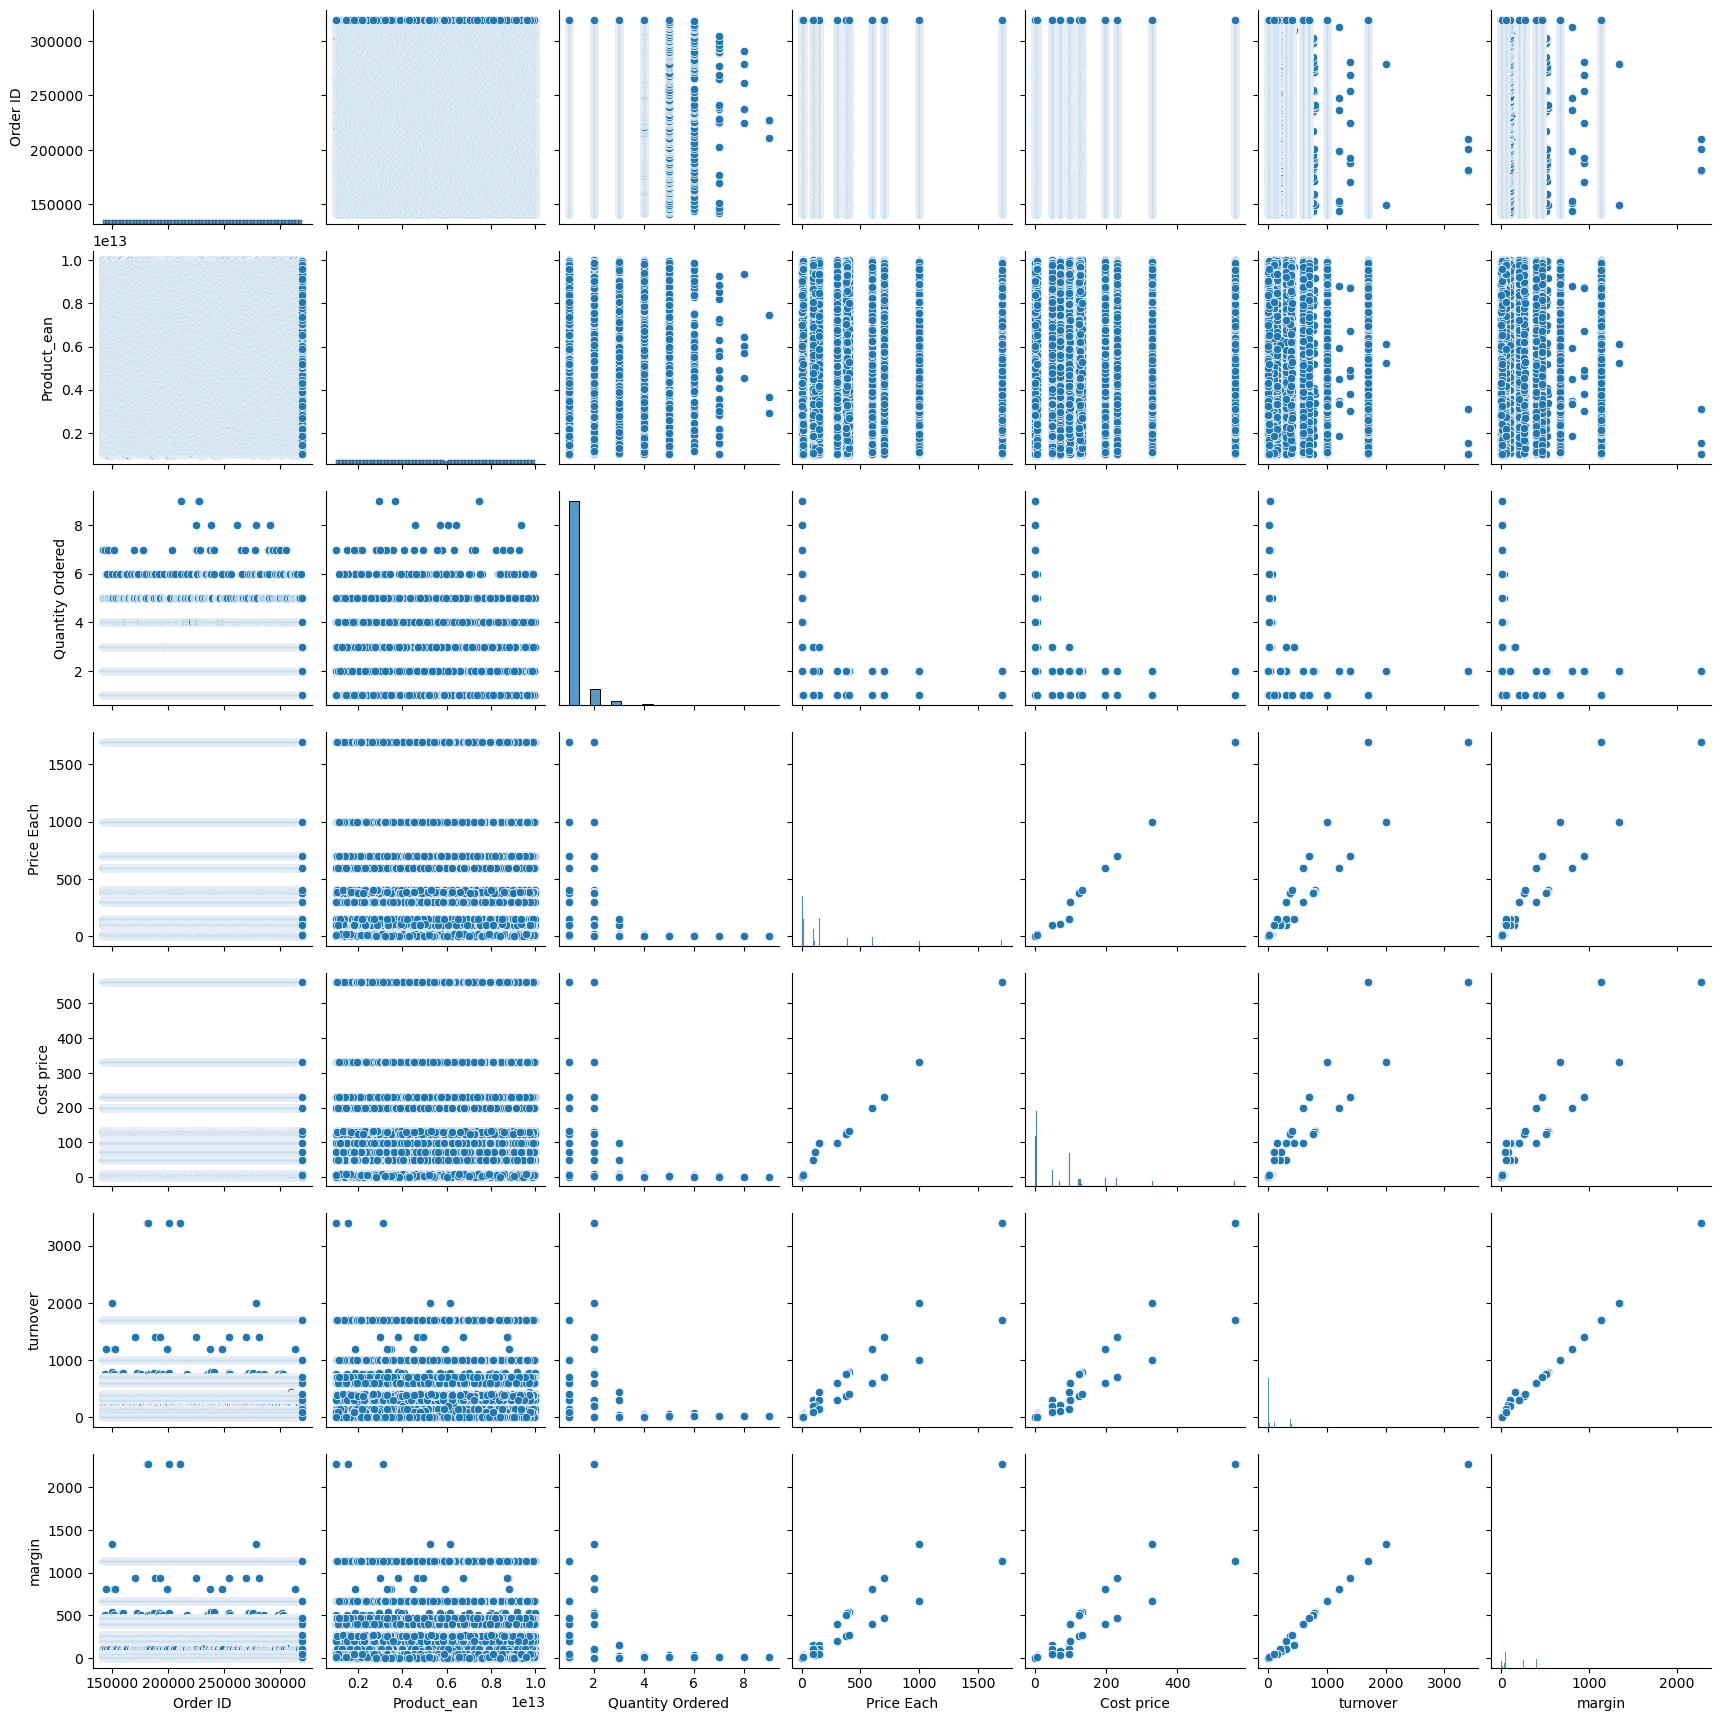

In [147]:
#Distribution of each category
sns.pairplot(Sales)

In [148]:
constraints = ['#B34D22', '#EBE00C']

def categorical_variable_summary(Sales, Category):
    fig = make_subplots(rows=1, cols=2,  # 1 row, 2 columns
                        subplot_titles=('Countplot', 'Percentage'),
                        specs=[[{'type': 'xy'}, {'type': 'domain'}]])
    
    fig.add_trace(go.Bar(y=Sales[Category].value_counts().values.tolist(),
                         x=[str(i) for i in Sales[Category].value_counts().index],
                         textfont=dict(size=14),
                         name='Category',
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=constraints[0])),  # Use the first color in 'constraints'
                   row=1, col=1)
    
    fig.add_trace(go.Pie(labels=Sales[Category].value_counts().keys(),
                         values=Sales[Category].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name='Category',
                         marker=dict(colors=constraints)),  
                  row=1, col=2)
    
    fig.update_layout(title={'text': Category,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')  
    
    # Use display() to show the plot in Jupyter Notebook
    display(fig)    

In [149]:
categorical_variable_summary(Sales,'Category')

In [150]:
#Products under Alimentation
Sports = Sales.loc[Sales['Category'] =='Sports']

Sports


,Order Date,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
18,2019-01-30 09:28:00,141252,USB-C Charging Cable,3.692435e+12,Sports,"220 9th St, Los Angeles, CA 90001",1,11.95,5.9750,11.95,5.9750
23,2019-01-12 18:51:00,141257,Apple Airpods Headphones,8.586660e+12,Sports,"338 Highland St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000
24,2019-01-19 21:47:00,141258,AA Batteries (4-pack),5.050924e+12,Sports,"820 1st St, San Francisco, CA 94016",1,3.84,1.9200,3.84,1.9200
27,2019-01-09 18:14:00,141261,USB-C Charging Cable,3.832854e+12,Sports,"840 Lincoln St, Atlanta, GA 30301",1,11.95,5.9750,11.95,5.9750
...,...,...,...,...,...,...,...,...,...,...,...
185917,2019-12-22 19:08:00,319638,USB-C Charging Cable,4.455496e+12,Sports,"235 Spruce St, Portland, OR 97035",1,11.95,5.9750,11.95,5.9750
185919,2019-12-10 08:51:00,319640,Apple Airpods Headphones,8.473976e+12,Sports,"116 Hickory St, Los Angeles, CA 90001",1,150.00,97.5000,150.00,52.5000
185926,2019-12-28 17:43:00,319647,AA Batteries (4-pack),3.229104e+12,Sports,"119 Spruce St, San Francisco, CA 94016",2,3.84,1.9200,7.68,3.8400
185937,2019-12-24 20:46:00,319658,AAA Batteries (4-pack),4.318879e+12,Sports,"574 Dogwood St, San Francisco, CA 94016",2,2.99,1.4950,5.98,2.9900


In [160]:
Sports.describe()

,Order ID,Product_ean,Quantity Ordered,Price Each,Cost price,turnover,margin
count,46925.000000,4.692500e+04,46925.000000,46925.000000,46925.000000,46925.000000,46925.000000
mean,230271.798636,5.507782e+12,1.123410,183.671460,69.534650,184.769109,114.695996
std,51558.464806,2.604178e+12,0.440626,332.161034,109.255566,332.364595,224.856678
min,141237.000000,1.000368e+12,1.000000,2.990000,1.495000,2.990000,1.495000
25%,185836.000000,3.243625e+12,1.000000,11.950000,5.975000,11.950000,5.975000
50%,229884.000000,5.511173e+12,1.000000,14.950000,7.475000,14.950000,7.475000
75%,275119.000000,7.765558e+12,1.000000,150.000000,97.500000,150.000000,52.500000
max,319660.000000,9.999983e+12,9.000000,1700.000000,561.000000,3400.000000,2278.000000


In [161]:
#check the Ordered product 

fig = go.Figure()


fig.add_trace(go.Bar(
    y=Sports['Product'].value_counts().values.tolist(),
    x=[str(i) for i in Sports['Product'].value_counts().index],
    textfont=dict(size=14),
    name='Product',
    textposition='auto',
    
    showlegend=False,
    marker=dict(color=constraints[0])

))
fig.update_layout(title={'text':'Ordered Products under Sports' ,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white') 

# Display the figure
fig.show()



In [162]:
Sports.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46925 entries, 2019-01-05 20:33:00 to 2019-12-16 17:41:00
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          46925 non-null  int64  
 1   Product           46925 non-null  object 
 2   Product_ean       46925 non-null  float64
 3   Category          46925 non-null  object 
 4   Purchase Address  46925 non-null  object 
 5   Quantity Ordered  46925 non-null  int64  
 6   Price Each        46925 non-null  float64
 7   Cost price        46925 non-null  float64
 8   turnover          46925 non-null  float64
 9   margin            46925 non-null  float64
 10  Month             46925 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.3+ MB


In [164]:
Sports

,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Month
Order Date,,,,,,,,,,,
2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,January
2019-01-30 09:28:00,141252,USB-C Charging Cable,3.692435e+12,Sports,"220 9th St, Los Angeles, CA 90001",1,11.95,5.9750,11.95,5.9750,January
2019-01-12 18:51:00,141257,Apple Airpods Headphones,8.586660e+12,Sports,"338 Highland St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000,January
2019-01-19 21:47:00,141258,AA Batteries (4-pack),5.050924e+12,Sports,"820 1st St, San Francisco, CA 94016",1,3.84,1.9200,3.84,1.9200,January
2019-01-09 18:14:00,141261,USB-C Charging Cable,3.832854e+12,Sports,"840 Lincoln St, Atlanta, GA 30301",1,11.95,5.9750,11.95,5.9750,January
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-22 19:08:00,319638,USB-C Charging Cable,4.455496e+12,Sports,"235 Spruce St, Portland, OR 97035",1,11.95,5.9750,11.95,5.9750,December
2019-12-10 08:51:00,319640,Apple Airpods Headphones,8.473976e+12,Sports,"116 Hickory St, Los Angeles, CA 90001",1,150.00,97.5000,150.00,52.5000,December
2019-12-28 17:43:00,319647,AA Batteries (4-pack),3.229104e+12,Sports,"119 Spruce St, San Francisco, CA 94016",2,3.84,1.9200,7.68,3.8400,December


In [180]:
# Striping Month to chech the turnover of the Sports Products by months
Sports['Month'] = Sports['Order Date'].dt.month_name()


/var/folders/x6/mz0xnc7s4jd7lm8tdk0nk2140000gq/T/ipykernel_3741/2395267526.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
# Month with most Alimentation orders 
Most = Sports['Month'].value_counts().sort_values()

Most



January      2458
August       2923
September    2940
February     3016
June         3496
July         3549
March        3841
May          4188
November     4424
April        4692
October      5064
December     6334
Name: Month, dtype: int64

Text(0, 0.5, 'Number of orderes')

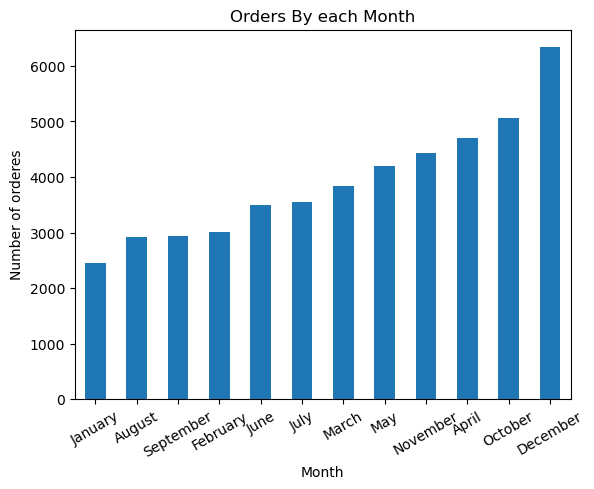

In [156]:
Most.plot(kind="bar", title="Monthly Orders")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Orders By each Month")
plt.xlabel("Month")
plt.ylabel("Number of orderes")

In [157]:
Sports.set_index('Order Date', inplace=True)

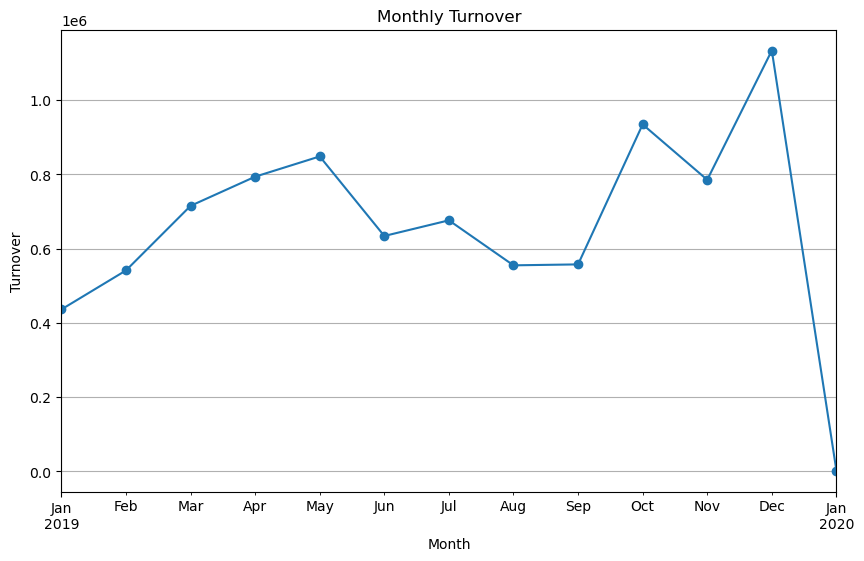

In [158]:
#Turnover for each product ordered 
monthly_turnover = Alimentation['turnover'].resample('M').sum()

plt.figure(figsize=(10, 6))
monthly_turnover.plot(marker='o', linestyle='-')
plt.title('Monthly Turnover')
plt.xlabel('Month')
plt.ylabel('Turnover')
plt.grid(True)
plt.show()




In [165]:
#Ordered the most in December
Most_Ord = Sports.loc[Sports['Month'] == 'December']
Product_ = Most_Ord['Product'].value_counts()

Product_

USB-C Charging Cable          741
AAA Batteries (4-pack)        734
AA Batteries (4-pack)         724
Lightning Charging Cable      700
Wired Headphones              648
Apple Airpods Headphones      530
Bose SoundSport Headphones    452
iPhone                        231
27in FHD Monitor              226
34in Ultrawide Monitor        211
27in 4K Gaming Monitor        207
Google Phone                  188
Macbook Pro Laptop            174
20in Monitor                  166
Flatscreen TV                 164
ThinkPad Laptop               131
Vareebadd Phone                64
LG Washing Machine             22
LG Dryer                       21
Name: Product, dtype: int64

Text(0, 0.5, 'Number of Products')

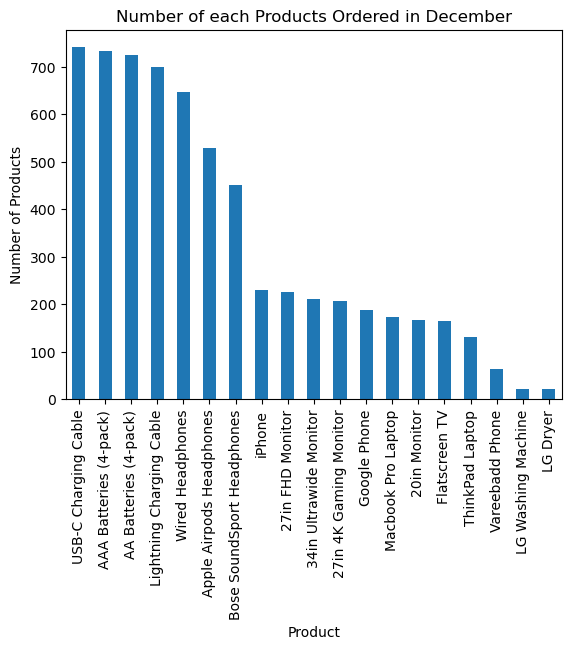

In [166]:
Product_.plot(kind="bar", title="Products Ordered in December")
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Number of each Products Ordered in December")
plt.xlabel("Product")
plt.ylabel("Number of Products")

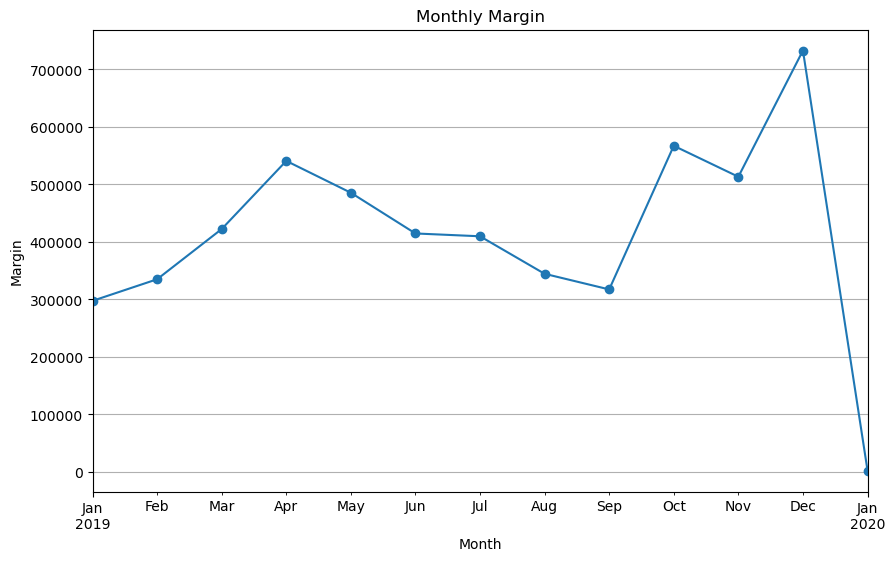

In [167]:
#Margin for each Product in December

monthly_turnover = Sports['margin'].resample('M').sum()

plt.figure(figsize=(10, 6))
monthly_turnover.plot(marker='o', linestyle='-')
plt.title('Monthly Margin')
plt.xlabel('Month')
plt.ylabel('Margin')
plt.grid(True)
plt.show()

In [176]:
Sports.reset_index('Order Date', inplace=True)

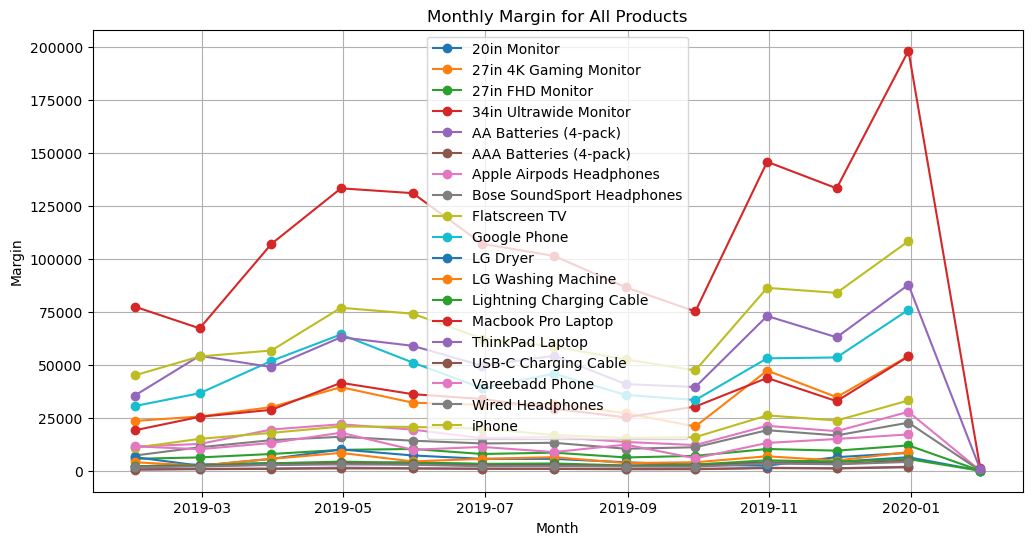

In [179]:
plt.figure(figsize=(12, 6))
for product, group in Sports.groupby('Product'):
    monthly_margin = group.set_index('Order Date')['margin'].resample('M').sum()
    plt.plot(monthly_margin.index, monthly_margin, marker='o', label=product)

plt.title('Monthly Margin for All Products')
plt.xlabel('Month')
plt.ylabel('Margin')
plt.grid(True)
plt.legend()
plt.show()

